# Part 2 and 3 of Make Your Own Neural Network

In [1]:
2 * 3

6

In [2]:
print("hello world!")

hello world!


In [3]:
x = 10
print(x)
print(x + 5)
y = x+7
print(y)

print(Z)


10
15
17


NameError: name 'Z' is not defined

In [4]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
for n in range(10):
    print(n)
    pass
print("done")

0
1
2
3
4
5
6
7
8
9
done


In [6]:
for n in range(10):
    print("The square of", n, 'is', n*n)
    pass
print("done")

The square of 0 is 0
The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16
The square of 5 is 25
The square of 6 is 36
The square of 7 is 49
The square of 8 is 64
The square of 9 is 81
done


In [7]:
# the following prints out the cube of 2
print(2**3)

8


In [8]:
# function that takes 2 numbers as input
# and outputs their average
def avg(x,y):
    print("first input is:" , x)
    print("second input is:", y)
    a = (x+y)/2.0
    print("Average is:" , a)
    return a

In [9]:
avg(2,4)

first input is: 2
second input is: 4
Average is: 3.0


3.0

In [11]:
avg(200,301)

first input is: 200
second input is: 301
Average is: 250.5


250.5

In [12]:
import numpy

In [13]:
a = numpy.zeros([3,2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [14]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [15]:
print(a[0,1])
v = a[1,0]
print(v)

2.0
9.0


In [17]:
a[0,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [18]:
import matplotlib.pyplot

In [19]:
%matplotlib inline

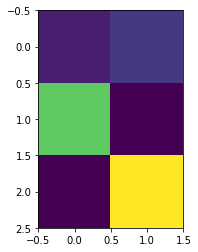

In [21]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [22]:
# class for a dog object
class Dog:
    #dogs can bark()
    def bark(self):
        print("woof!")
        pass
    pass

In [23]:
sizzles = Dog()
sizzles.bark()

woof!


In [24]:
sizzles = Dog()
mutley = Dog()

sizzles.bark()
mutley.bark()

woof!
woof!


In [29]:
#class for a dog object
class Dog:
    #initialization method with internal data
    def __init__(self,petname, temp):
        self.name = petname;
        self.temperature = temp;
    
    #get status
    def status(self):
        print("dog name is ", self.name)
        print("dog temperature is ", self.temperature)
        pass
    
    # set temperature
    def setTemperature(self, temp):
        self.temperature = temp
        pass
    
    #dogs can bark()
    def bark(self):
        print("woof!")
        pass
    
    pass

In [30]:
lassie = Dog("Lassie", 37)

In [31]:
lassie.status()

dog name is  Lassie
dog temperature is  37


In [32]:
lassie.setTemperature(40)

In [33]:
lassie.status()

dog name is  Lassie
dog temperature is  40


# Neural Network with Python

In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# scipy.ndimage for rotating image arrays
import scipy.ndimage
#library for plotting arrays
import matplotlib.pyplot
#ensures that plots are inside this notebook, not an external window
%matplotlib inline

In [2]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [3]:

# neural network class definition
class neuralNetwork:
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #learning rate
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass
    
   # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputs_list):
        #convert inputs list to 2nd array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        #calculate signals into hidden layer
        hidden_inputs  = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        #calcualte the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

    

### number of input, hidden, and output nodes

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.2

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)




### Loading training data

In [5]:
#load the mnist training data csv file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### train the neural networks with original data

In [6]:
epochs = 5
for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

### train the neural networks with rotated data

In [11]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 2

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass

### Loading test Data

In [12]:
#load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

### Loading Own Image Test Data Set

In [13]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  my_own_images/2828_my_own_3.png
0.01
1.0
loading ...  my_own_images/2828_my_own_2.png
0.01
1.0
loading ...  my_own_images/2828_my_own_5.png
0.01
0.86800003
loading ...  my_own_images/2828_my_own_4.png
0.01
0.93011767
loading ...  my_own_images/2828_my_own_6.png
0.01
1.0


### Manual Test to See if Network Works

In [156]:
#got the first test record
all_values = test_data_list[0].split(",")
#print the label
print(all_values[0])

7


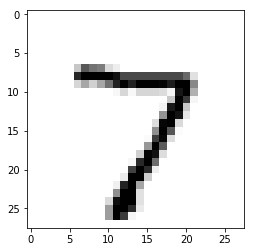

In [157]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = "None")

In [158]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.1388021 ],
       [0.09238733],
       [0.04516929],
       [0.18335392],
       [0.19698127],
       [0.04104479],
       [0.04128286],
       [0.46221069],
       [0.13633725],
       [0.1065481 ]])

### Test with Original Data

In [8]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [9]:
#print(scorecard)

In [10]:
#calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance =  ", scorecard_array.sum()/scorecard_array.size)

performance =   0.969


### Test With Rotated Data

In [13]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

### Rotated Data performed slightly less due to experimenting with various epochs and learning rates. Highest performance I had was 97.3

In [15]:
#calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance =  ", scorecard_array.sum()/scorecard_array.size)

performance =   0.9589


## Running Backquery to see what network draws

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


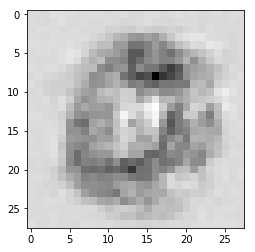

In [12]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

## Testing With Own Images

[[7.52651171e-05]
 [2.41254411e-02]
 [2.79534839e-04]
 [2.33185338e-02]
 [3.17612397e-04]
 [9.96767071e-01]
 [2.75617401e-03]
 [1.06991367e-02]
 [1.63881934e-05]
 [7.08348159e-04]]
network says  5
match!


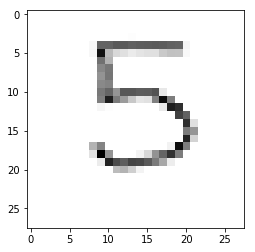

In [14]:
# test the neural network with our own images

# record to test
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass